In [ ]:
# importa biblioteca
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn.decomposition import PCA


dataset = datasets.load_diabetes()
df1= pd.DataFrame(dataset.data,columns=dataset.feature_names)
df1

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [ ]:
# Analisando as correlações
corr = df1.iloc[:,0:15].corr()
corr

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731
sex,0.173737,1.000000,0.088161,0.241013,0.035277,0.142637,-0.379090,0.332115,0.149918,0.208133
bmi,0.185085,0.088161,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680
bp,0.335427,0.241013,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429
s1,0.260061,0.035277,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717
s2,0.219243,0.142637,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600
s3,-0.075181,-0.379090,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697
s4,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212
s5,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670
s6,0.301731,0.208133,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000


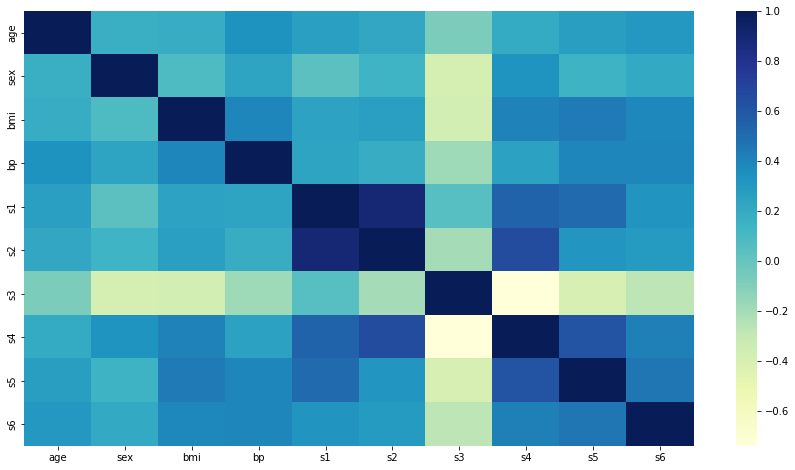

In [ ]:
#correlações
plt.figure(figsize = (15,8))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, cmap="YlGnBu" )


In [ ]:
# Usando o PCA
principal=PCA(n_components=10)
principal.fit(df1)
x = principal.transform(df1)


print('Dimensões: ', x.shape)

# Check the values of eigen vectors
# prodeced by principal components
print('Componentes: ', principal.components_)
# check how much variance is explained by each principal component
print('Variância dos componentes: ', principal.explained_variance_ratio_)
print('Variância somada: ', principal.explained_variance_ratio_.cumsum())

Dimensões:  (442, 10)
Componentes:  [[ 0.21643101  0.18696711  0.3031625   0.2717397   0.34325493  0.35186062
  -0.28243639  0.42883325  0.37861731  0.32218282]
 [ 0.04437151 -0.38654811 -0.15628061 -0.13825564  0.57302669  0.45593985
   0.50624287 -0.06818423 -0.0261893  -0.0849466 ]
 [ 0.49466811 -0.10685833  0.1675317   0.51356804 -0.0685867  -0.26969438
   0.38602787 -0.38068121  0.0636315   0.27684271]
 [-0.4140095  -0.67986052  0.49982533 -0.01966734 -0.06839533 -0.16777384
  -0.07602005  0.0079212   0.26442742  0.08708624]
 [-0.68686389  0.37345612  0.12935936  0.48689014  0.12917415  0.11673143
   0.24499115 -0.14364377 -0.1516611   0.03138792]
 [-0.2258505   0.04173103 -0.4031419  -0.27276274  0.00540864 -0.1332572
   0.1063716  -0.0339454   0.17873005  0.80506447]
 [-0.10953821 -0.06760551 -0.51985787  0.32064908  0.07364908 -0.23054011
  -0.00753445  0.07123619  0.64731345 -0.35727279]
 [ 0.01493468  0.44293966  0.39294187 -0.47736435  0.12941351 -0.19131121
   0.32463641 -0

In [ ]:
import numpy as np

principal.explained_variance_ratio_
np.round(principal.explained_variance_ratio_,2)

array([0.4 , 0.15, 0.12, 0.1 , 0.07, 0.06, 0.05, 0.04, 0.01, 0.  ])

In [ ]:
principal.explained_variance_ratio_.cumsum()

array([0.40242142, 0.55165324, 0.67224947, 0.76779711, 0.83401567,
       0.89428759, 0.94794364, 0.99131196, 0.99914395, 1.        ])